# Lab 4.01 - Bivariate Analysis of Qualitative Data


In [20]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 1 - soft-drinks


The file softdrinks.xlsx categorizes 250 randomly 
selected consumers on the basis of their gender, their 
age, and their preference for our brand or a competitor's brand of a low-calorie soft drink. Use a chi-square test for independence to see whether the drink 
preference is independent of gender, and then whether 
it is independent of age.  First make a plot

Results of the main calculations:
- age vs preference
  - χ² ≈ 3.8589  
  - p-value = 0.2771
  - We do not reject H0


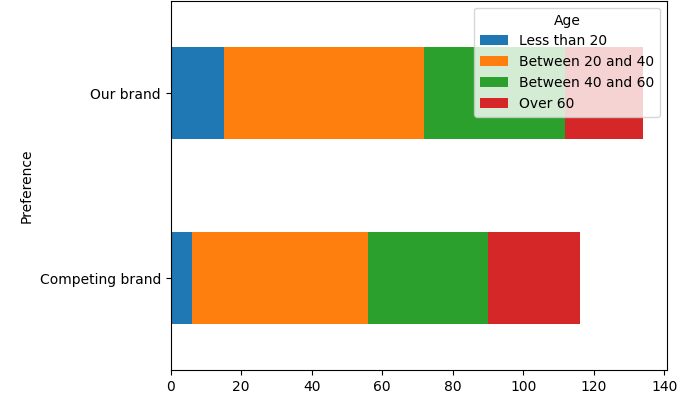



- gender vs preference
  - χ² ≈ 1.4078 
  - p-value = 0.2354
  - We do not reject H0

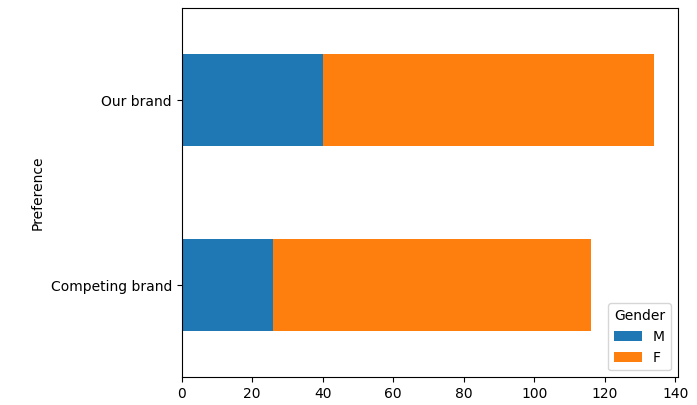

In [21]:
softd = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Softdrinks.csv', sep=";")

softd.head()

,Consumer,Gender,Age,Preference
0,1,F,Over 60,Our brand
1,2,F,Between 40 and 60,Our brand
2,3,M,Between 40 and 60,Our brand
3,4,F,Over 60,Competing brand
4,5,M,Between 20 and 40,Our brand


### Age vs Brand

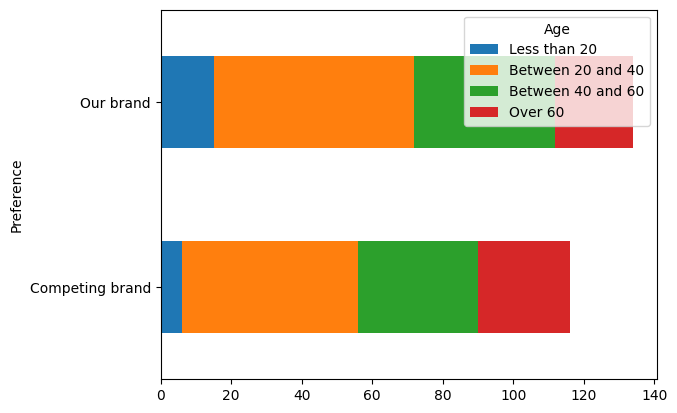

In [22]:

# Define correct categorical type with proper order
orderByAge = CategoricalDtype(categories=['Less than 20', 'Between 20 and 40', 'Between 40 and 60', 'Over 60'], ordered=True)

# Apply the categorical ordering to the Age column only
softd['Age'] = softd['Age'].astype(orderByAge)

# Create contingency table
observed = pd.crosstab(softd['Preference'], softd['Age'])

# Plot horizontally stacked bar chart
observed.plot(kind='barh', stacked=True);

In [23]:
alpha = .05
chi2, p, dof, expected = stats.chi2_contingency(observed)
print(f"Chi2: {chi2:.4f}, p-value: {p:.4f}, dof: {dof}")
# Calculate critical value
g = stats.chi2.isf(alpha, df = dof)
print(f"Critical value: {g:.4f}, alpha: {alpha:.4f}")
# Check if we can reject the null hypothesis (p-value & alpha)
if p < alpha:
    print("Reject H0: there is a significant association between x and y")
else:
    print("Do not reject H0: there is no significant association between x and y")

# Check if we can reject the null hypothesis (X^2 & critical value)
if chi2 > g:
    print("Reject H0: there is a significant association between x and y")
else:
    print("Do not reject H0: there is no significant association between x and y")


Chi2: 3.8589, p-value: 0.2771, dof: 3
Critical value: 7.8147, alpha: 0.0500
Do not reject H0: there is no significant association between x and y
Do not reject H0: there is no significant association between x and y


### Gender vs Brand

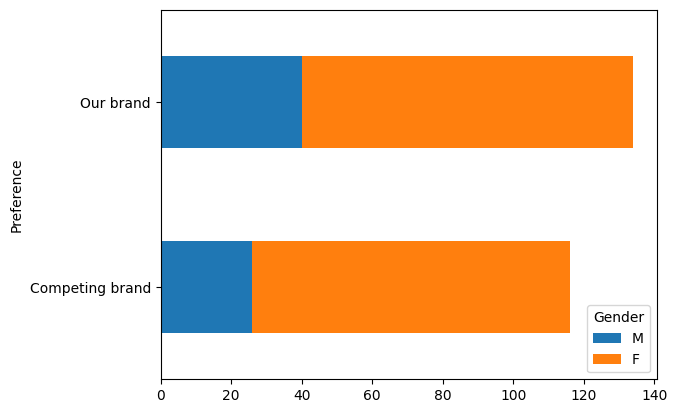

In [24]:
# Define correct categorical type with proper order
orderByGendre = CategoricalDtype(categories=['M','F'], ordered=True)

# Apply the categorical ordering to the Age column only
softd['Gender'] = softd['Gender'].astype(orderByGendre)

# Create contingency table
observed = pd.crosstab(softd['Preference'], softd['Gender'])

# Plot horizontally stacked bar chart
observed.plot(kind='barh', stacked=True);

In [25]:
alpha = .05
chi2, p, dof, expected = stats.chi2_contingency(observed)
print(f"Chi2: {chi2:.4f}, p-value: {p:.4f}, dof: {dof}")
# Calculate critical value
g = stats.chi2.isf(alpha, df = dof)
print(f"Critical value: {g:.4f}, alpha: {alpha:.4f}")
# Check if we can reject the null hypothesis (p-value & alpha)
if p < alpha:
    print("Reject H0: there is a significant association between x and y")
else:
    print("Do not reject H0: there is no significant association between x and y")

# Check if we can reject the null hypothesis (X^2 & critical value)
if chi2 > g:
    print("Reject H0: there is a significant association between x and y")
else:
    print("Do not reject H0: there is no significant association between x and y")


Chi2: 1.4078, p-value: 0.2354, dof: 1
Critical value: 3.8415, alpha: 0.0500
Do not reject H0: there is no significant association between x and y
Do not reject H0: there is no significant association between x and y
